##Dataset link

https://drive.google.com/drive/folders/1dVUSjeGoFbAxQ892-z6wtRyNEeyPIPry?usp=sharing

# 0. Check Running Eviroment

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Number GPUs Avalable: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.config.experimental.list_physical_devices('GPU'))
print(device_lib.list_local_devices())

Number GPUs Avalable:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18255532479164839732
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 115914183234818387
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# 1. Mounting Google Drive

In [ ]:
import os
# # os.mkdir('datasets')
# os.mkdir('datasets/train/')
# os.mkdir('datasets/train/fake/')
# os.mkdir('datasets/train/real/')

# os.mkdir('datasets/test/')
# os.mkdir('datasets/test/fake/')
# os.mkdir('datasets/test/real/')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2. Read Datasets from GDrive

In [3]:
data_dir = '/content/gdrive/MyDrive/Comviz_3/datasets'
width = 224
height = 224
batchSize = 32

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'training',
    seed = 12,
    image_size = (width, height),
    batch_size = batchSize,
    label_mode = 'categorical'
)

validation_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'validation',
    seed = 12,
    image_size = (width, height),
    batch_size = batchSize,
    label_mode = 'categorical'
)

Found 354 files belonging to 2 classes.
Using 284 files for training.
Found 354 files belonging to 2 classes.
Using 70 files for validation.


In [5]:
classNames = train_ds.class_names
print(classNames)

['fake', 'real']


# 3. Building Model

In [8]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
# from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall, Precision

def VGG16Model(input_shape, num_classes):

  # Input Layer
  input = Input(shape = input_shape)

  # Layer 1
  x = Conv2D(64, (3, 3), strides = 1, padding='same')(input)
  x = Activation('relu')(x)

  # Layer 2
  x = Conv2D(64, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((2,2), strides = 2, padding='same')(x)

  # layer 3
  x = Conv2D(128, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 4
  x = Conv2D(128, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((2,2), strides = 2, padding='same')(x)

  # layer 5
  x = Conv2D(256, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 6
  x = Conv2D(256, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 7
  x = Conv2D(256, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((2,2), strides = 2, padding='same')(x)

  # layer 8
  x = Conv2D(512, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 9
  x = Conv2D(512, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 10
  x = Conv2D(512, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((2,2), strides = 2, padding='same')(x)

  # layer 11
  x = Conv2D(512, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 12
  x = Conv2D(512, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 11
  x = Conv2D(512, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((2,2), strides = 2, padding='same')(x)

  # Flatten
  x = Flatten()(x)

  # Fully Connected Layer 1
  x = Dense(4096)(x)
  x = Activation('relu')(x)
  # x = Dropout(0.5)(x)

  # Fully Connected Layer 2
  x = Dense(4096)(x)
  x = Activation('relu')(x)
  # x = Dropout(0.5)(x)

  # Output Layer
  x = Dense(num_classes, activation = 'softmax')(x)

  # Compile the model
  model = Model(inputs = input, outputs = x)
  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy', Recall(), Precision()]
  )

  return model



In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.metrics import Recall, Precision

# def VGG16Model(input_shape, num_classes):
#     # Input Layer
#     input = Input(shape=input_shape)

#     # Block 1
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2))(x)

#     # Block 2
#     x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2))(x)

#     # Block 3
#     x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2))(x)

#     # Block 4
#     x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2))(x)

#     # Block 5
#     x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2))(x)

#     # Fully Connected Layers
#     x = Flatten()(x)
#     x = Dense(4096, activation='relu')(x)
#     x = Dense(4096, activation='relu')(x)
#     output = Dense(num_classes, activation='softmax')(x)

#     # Compile the model
#     model = Model(inputs=input, outputs=output)
#     model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy', Recall(), Precision()])

#     return model

In [9]:
myModel = VGG16Model(input_shape = [width, height, 3], num_classes = len(classNames))
myModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                             

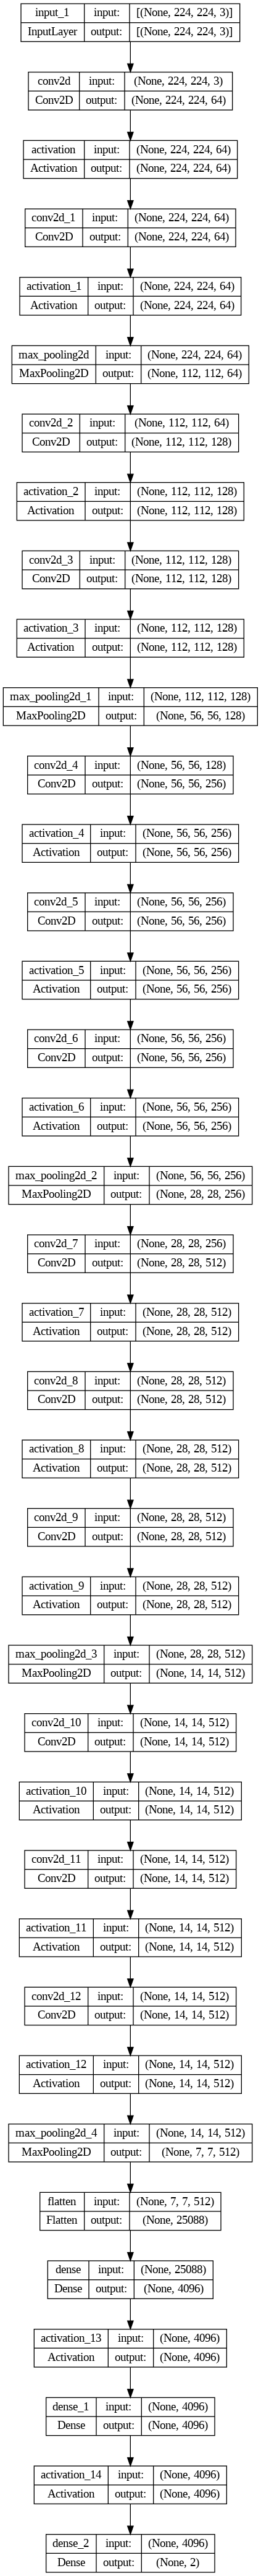

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(myModel, to_file='My Model.png', show_shapes=True)

# 4. Training Model

In [11]:
from datetime import datetime

start_time = datetime.now()

history = myModel.fit(
    train_ds,
    batch_size = batchSize,
    epochs = 10,
    validation_data = validation_ds,
    verbose = 1
)

end_time = datetime.now()
print("Duration: "+str(end_time - start_time))
myModel.save('/content/modelCNN_VGGnet')

Epoch 1/10
9/9 [==============================] - 70s 3s/step - loss: 6222.9980 - accuracy: 0.4824 - recall: 0.4824 - precision: 0.4824 - val_loss: 3.4100 - val_accuracy: 0.6714 - val_recall: 0.6714 - val_precision: 0.6714
Epoch 2/10
9/9 [==============================] - 5s 463ms/step - loss: 1.0681 - accuracy: 0.5246 - recall: 0.5246 - precision: 0.5246 - val_loss: 0.6747 - val_accuracy: 0.6714 - val_recall: 0.6714 - val_precision: 0.6714
Epoch 3/10
9/9 [==============================] - 5s 437ms/step - loss: 0.7323 - accuracy: 0.5880 - recall: 0.5880 - precision: 0.5880 - val_loss: 0.6788 - val_accuracy: 0.6714 - val_recall: 0.6714 - val_precision: 0.6714
Epoch 4/10
9/9 [==============================] - 4s 438ms/step - loss: 0.6817 - accuracy: 0.5880 - recall: 0.5880 - precision: 0.5880 - val_loss: 0.6811 - val_accuracy: 0.6714 - val_recall: 0.6714 - val_precision: 0.6714
Epoch 5/10
9/9 [==============================] - 5s 464ms/step - loss: 0.6870 - accuracy: 0.5880 - recall: 0.5

# 5. Evaluation

In [12]:
# Average
import numpy as np

print("Duration: "+str(end_time - start_time))
print("\nTesting Evaluation")
print("Average loss: ", np.average(history.history['loss']))
print("Average accuracy: ", np.average(history.history['accuracy']))
print("Average recall: ", np.average(history.history['recall']))
print("Average precision: ", np.average(history.history['precision']))

print("\nValidation Evaluation")
print("Average loss: ", np.average(history.history['val_loss']))
print("Average accuracy: ", np.average(history.history['val_accuracy']))
print("Average recall: ", np.average(history.history['val_recall']))
print("Average precision: ", np.average(history.history['val_precision']))

Duration: 0:01:52.772606

Testing Evaluation
Average loss:  622.9586337268353
Average accuracy:  0.5669014245271683
Average recall:  0.5669014245271683
Average precision:  0.5669014245271683

Validation Evaluation
Average loss:  0.9377389848232269
Average accuracy:  0.6714285612106323
Average recall:  0.6714285612106323
Average precision:  0.6714285612106323


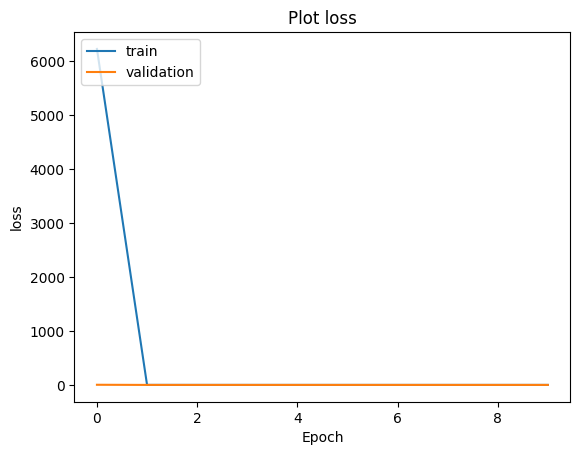

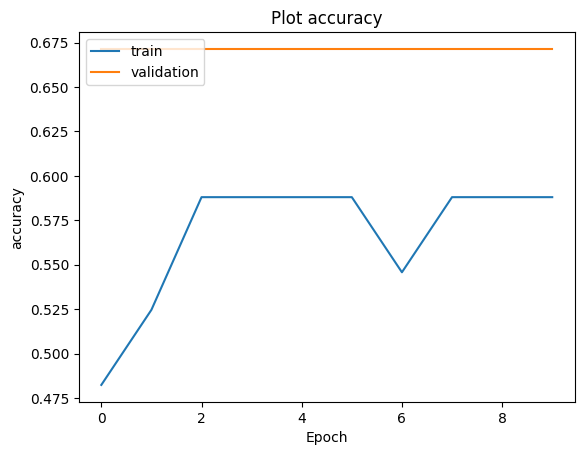

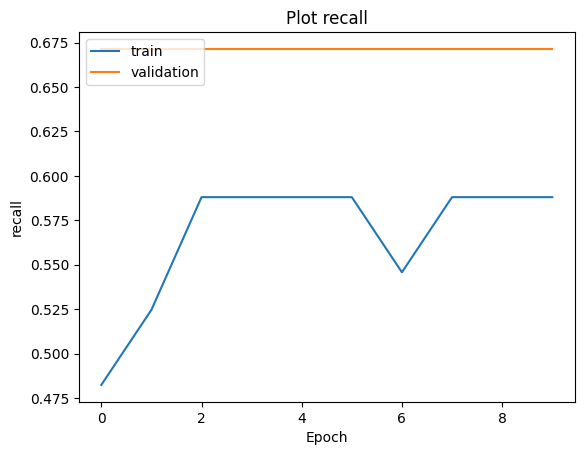

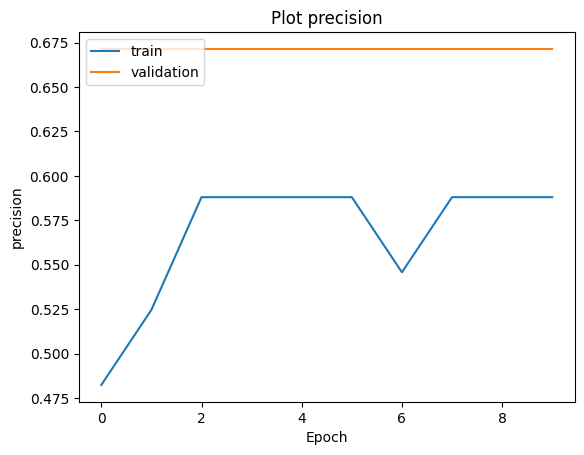

In [13]:
import matplotlib.pyplot as plt

def plot_history(hist, label):
  plt.plot(hist.history[label])
  plt.plot(hist.history['val_'+label])
  plt.title('Plot '+label)
  plt.ylabel(label)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot_history(history, 'loss')
plot_history(history, 'accuracy')
plot_history(history, 'recall')
plot_history(history, 'precision')

# 6. Testing

In [14]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/modelCNN_VGGnet')
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                             

In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.math import confusion_matrix

test_data = ImageDataGenerator()

test_ds = test_data.flow_from_directory(
    '/content/gdrive/MyDrive/Comviz_3/datasets',
    target_size=(width, height),
    batch_size = batchSize,
    class_mode = 'categorical'
)

class_names = []
for key, value in test_ds.class_indices.items():
  class_names.append(key)

predictions = np.array([])
labels = np.array([])

for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(loaded_model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y, axis=-1)])

matrix = confusion_matrix(labels = labels, predictions = predictions).numpy()

df = pd.DataFrame(matrix, columns = class_names, index = class_names)
df

Found 424 images belonging to 2 classes.
1/1 [==============================] - 0s 35ms/step


KeyboardInterrupt: ignored

In [ ]:
# import seaborn as sns
# sns.heatmap(df, annot = True, fmt='d')